In [24]:
import time
import json
import pandas as pd 
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
#读取json数据
path = '/home/chocolate/LSTM-source/silver_data/'
data = DataFrame(json.loads(open(path + '1001-1031.json','r').read()))
data[:10]

,_id,close,datetime,exchange,high,low,open,openInterest,symbol,volume
0,5865bdb97932152b155ec049,39.62,1483048799000,CSRPME,39.62,39.62,39.62,NaN,D1_AG,55267088
1,5865bdf77932152b155ec0c7,39.63,1483062714000,CSRPME,39.63,39.62,39.63,NaN,D1_AG,4819394
2,5865be357932152b155ec13c,39.62,1483062776000,CSRPME,39.62,39.61,39.62,NaN,D1_AG,4840022
3,5865d1737932152f90d9f4dc,39.67,1483067700000,CSRPME,39.68,39.65,39.67,NaN,D1_AG,9336366
4,5865d1b17932152f90d9f558,39.66,1483067764000,CSRPME,39.67,39.66,39.66,NaN,D1_AG,9438460
5,5865d1ef7932152f90d9f5b8,39.67,1483067826000,CSRPME,39.68,39.66,39.66,NaN,D1_AG,9439228
6,5865d22d7932152f90d9f612,39.66,1483067888000,CSRPME,39.67,39.65,39.66,NaN,D1_AG,9541758
7,5865d26e7932152f90d9f684,39.65,1483067952000,CSRPME,39.66,39.63,39.66,NaN,D1_AG,9629034
8,5865d2ac7932152f90d9f6e9,39.63,1483068014000,CSRPME,39.65,39.63,39.64,NaN,D1_AG,9694442
9,5865d2eb7932152f90d9f750,39.64,1483068077000,CSRPME,39.65,39.63,39.63,NaN,D1_AG,9712584


In [29]:
#将时间戳转成正常时间格式
time_date = []
for i in data['datetime']:
    time1 = time.localtime(i/1000)
    time2 = time.strftime("%Y-%m-%d %H:%M:%S",time1)
    time_date.append(time2)
data['datetime'] = time_date
data = data.drop(0)
data.index = range(len(data))
print len(data)

# data
#按时间排序
data = data.sort_values(by = 'datetime')

#去重
data = data.drop_duplicates('datetime')
data.index = range(len(data))
print len(data)
data

55951
54914


,_id,close,datetime,exchange,high,low,open,openInterest,symbol,volume
0,586634807932152f440ce664,39.34,2016-11-18 00:00:00,CSRPME,39.35,39.35,39.33,NaN,D1_AG,67137074
1,586634807932152f440ce665,39.35,2016-11-18 00:01:02,CSRPME,39.36,39.36,39.34,NaN,D1_AG,67153356
2,586634807932152f440ce666,39.36,2016-11-18 00:02:04,CSRPME,39.36,39.36,39.35,NaN,D1_AG,67164174
3,586634807932152f440ce667,39.37,2016-11-18 00:03:06,CSRPME,39.37,39.37,39.36,NaN,D1_AG,67167974
4,586634807932152f440ce668,39.38,2016-11-18 00:04:08,CSRPME,39.39,39.39,39.37,NaN,D1_AG,67185308
5,5866347d7932152f440cddd2,39.37,2016-11-18 00:05:10,CSRPME,39.39,39.39,39.38,NaN,D1_AG,67307322
6,5866347d7932152f440cddd3,39.38,2016-11-18 00:06:12,CSRPME,39.38,39.38,39.37,NaN,D1_AG,67358148
7,5866347d7932152f440cddd4,39.37,2016-11-18 00:07:14,CSRPME,39.38,39.38,39.38,NaN,D1_AG,67366188
8,5866347d7932152f440cddd5,39.38,2016-11-18 00:08:16,CSRPME,39.39,39.39,39.37,NaN,D1_AG,67374058
9,5866347d7932152f440cddd6,39.38,2016-11-18 00:09:18,CSRPME,39.39,39.39,39.38,NaN,D1_AG,67380130


In [30]:
# print min(data['close'])
# print max(data['close'])
# print data['close'].mean()
data1 = DataFrame()
data1 = data[[u'datetime', u'close', u'high', u'low', u'open',u'volume']]
# data1

In [19]:
data1.to_csv(path + 'raw_0117-0212.csv')

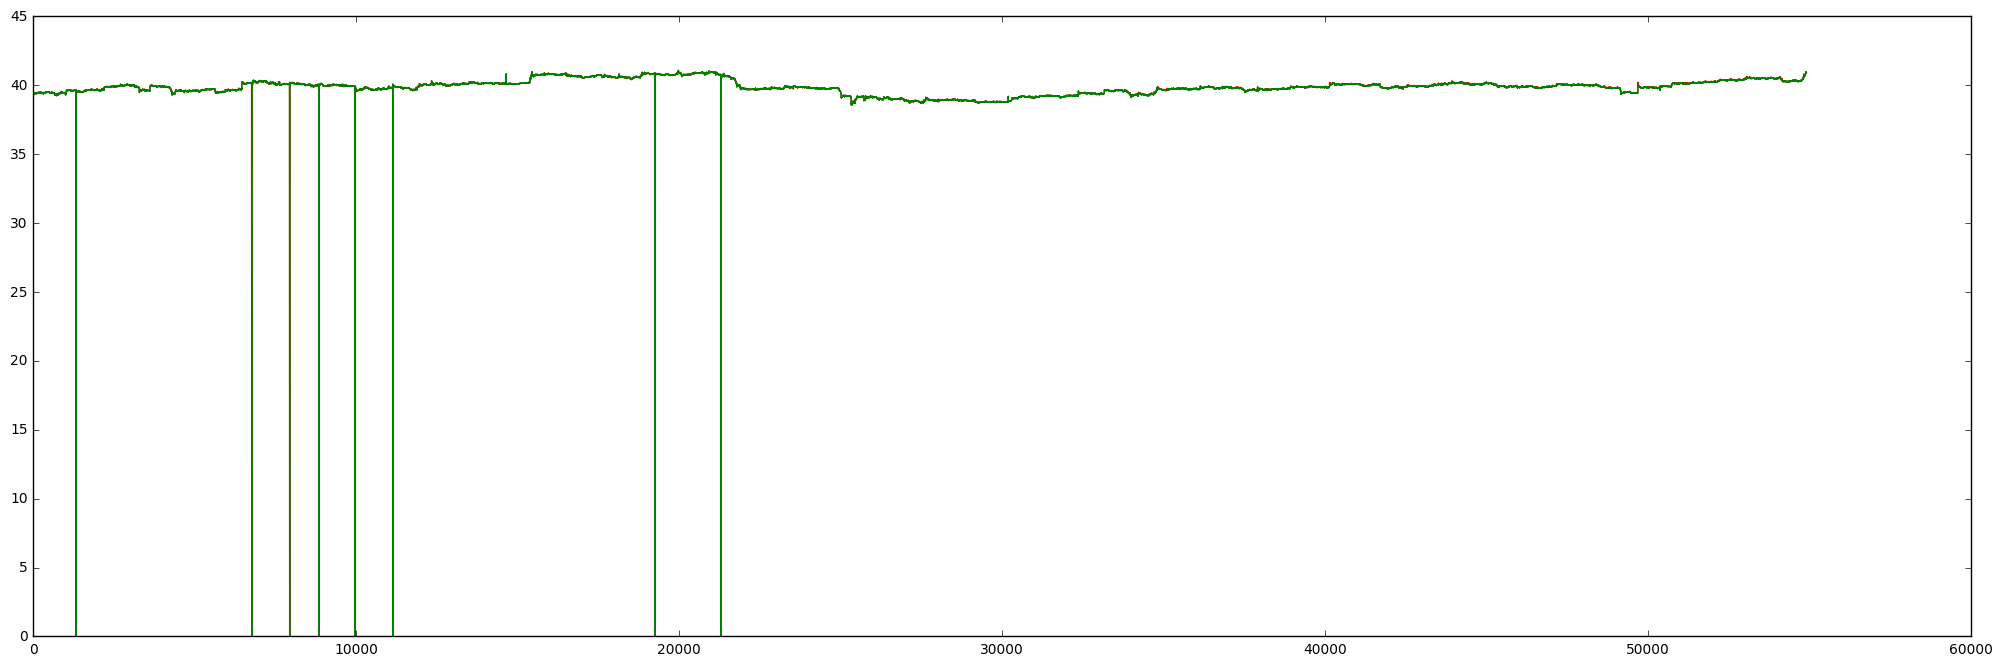

In [31]:
plt.figure(figsize=(25,8)) 
plt.plot(data1['high'],'red')
plt.plot(data1['low'],'green')

In [35]:
delete_list = []
for k in range(len(data1)):
    if data1['high'].iloc[k] == 0 or data1['close'].iloc[k] == 0 or data1['low'].iloc[k] == 0 or data1['open'].iloc[k] == 0:
        delete_list.append(k)
    if data1['high'].iloc[k] < data1['close'].iloc[k] or data1['high'].iloc[k] < data1['open'].iloc[k]:
        delete_list.append(k)
    if data1['low'].iloc[k] > data1['close'].iloc[k] or data1['low'].iloc[k] > data1['open'].iloc[k]:
        delete_list.append(k)
    if data1['high'].iloc[k] == data1['low'].iloc[k] and data1['high'].iloc[k] == data1['open'].iloc[k] and data1['high'].iloc[k] == data1['close'].iloc[k]:
        delete_list.append(k)
data2 = data1.drop(delete_list)
data2.index = range(len(data2))
data2

,datetime,close,high,low,open,volume
0,2016-12-30 09:51:54,39.63,39.63,39.62,39.63,4819394
1,2016-12-30 09:52:56,39.62,39.62,39.61,39.62,4840022
2,2016-12-30 11:15:00,39.67,39.68,39.65,39.67,9336366
3,2016-12-30 11:16:04,39.66,39.67,39.66,39.66,9438460
4,2016-12-30 11:17:06,39.67,39.68,39.66,39.66,9439228
5,2016-12-30 11:18:08,39.66,39.67,39.65,39.66,9541758
6,2016-12-30 11:19:12,39.65,39.66,39.63,39.66,9629034
7,2016-12-30 11:20:14,39.63,39.65,39.63,39.64,9694442
8,2016-12-30 11:21:17,39.64,39.65,39.63,39.63,9712584
9,2016-12-30 11:22:21,39.64,39.64,39.63,39.63,9782498


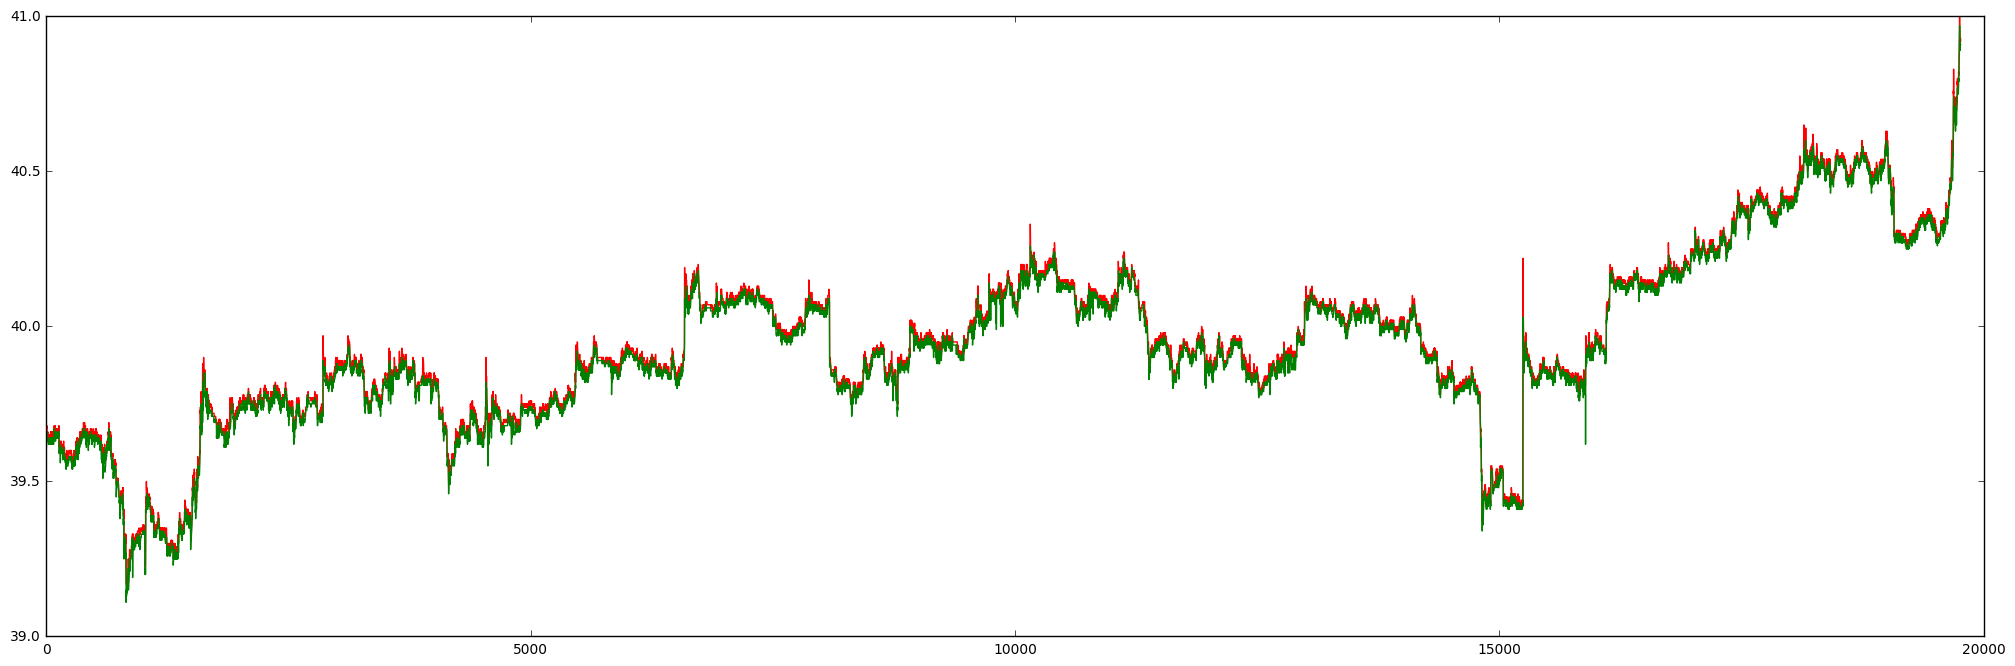

In [36]:
plt.figure(figsize=(25,8)) 
plt.plot(data2['high'],'red')
plt.plot(data2['low'],'green')

In [37]:
data2.to_csv(path + 'cleaned_1230-0213.csv')